<a href="https://colab.research.google.com/github/Git-Hub-Pro/Data-visualization/blob/master/make_Data_chart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# google colab에 gdrive mount 하기(아래 링크 클릭후, 내용 복사 후 입력하기)
# 12시간 지나면 자동으로 해제되어서 지속적으로 로그인을 해주어야 한다.
from google.colab import drive
drive.mount('/content/gdrive/')

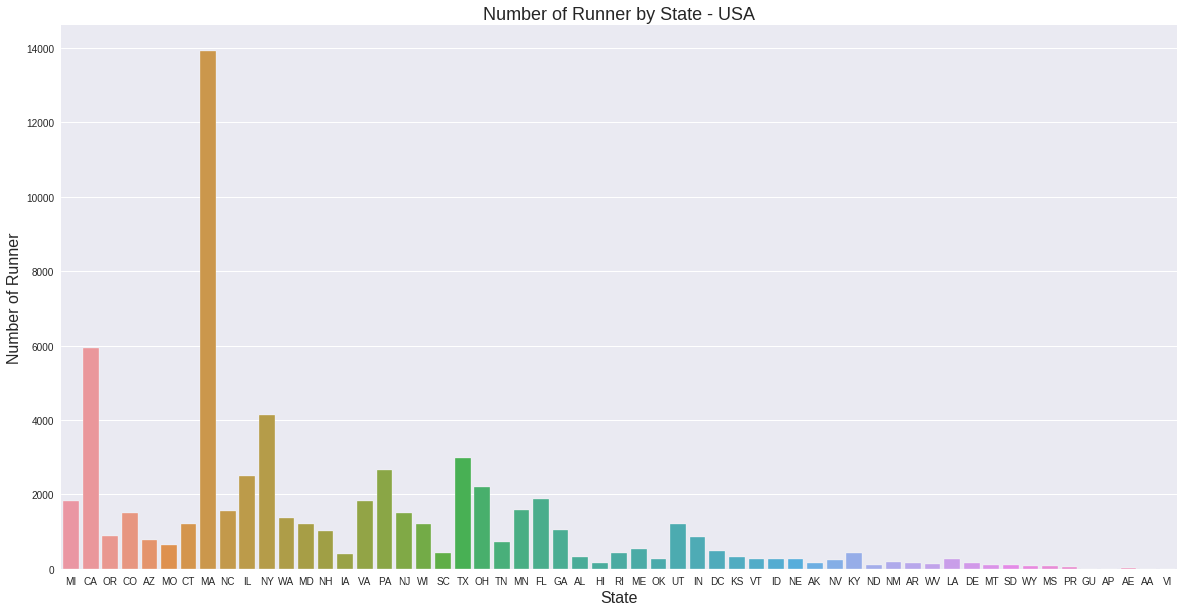

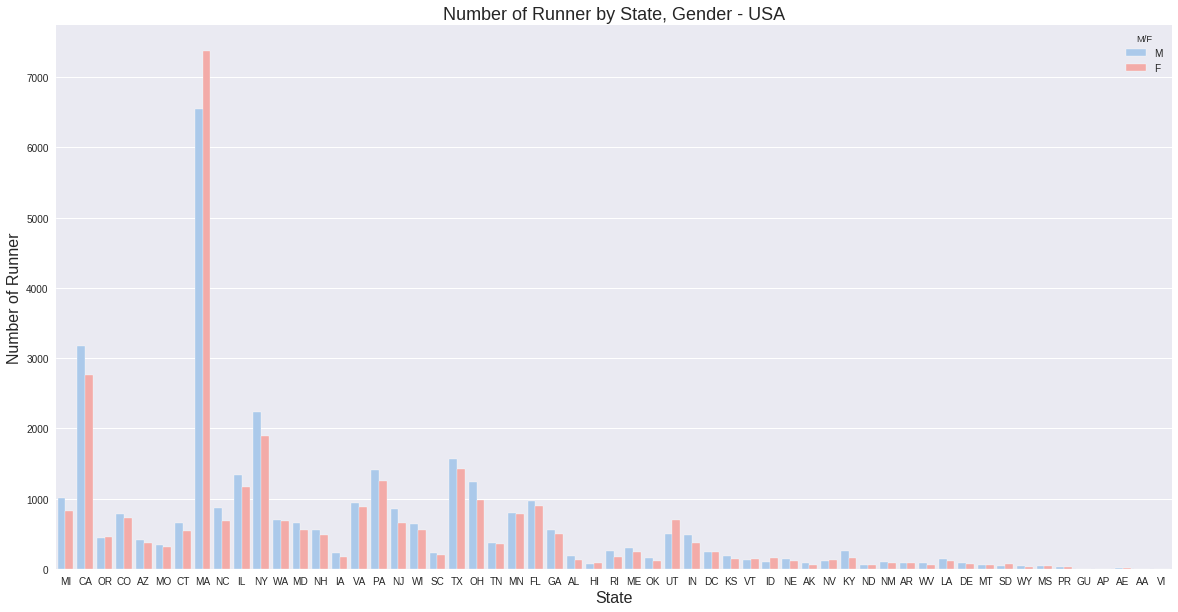

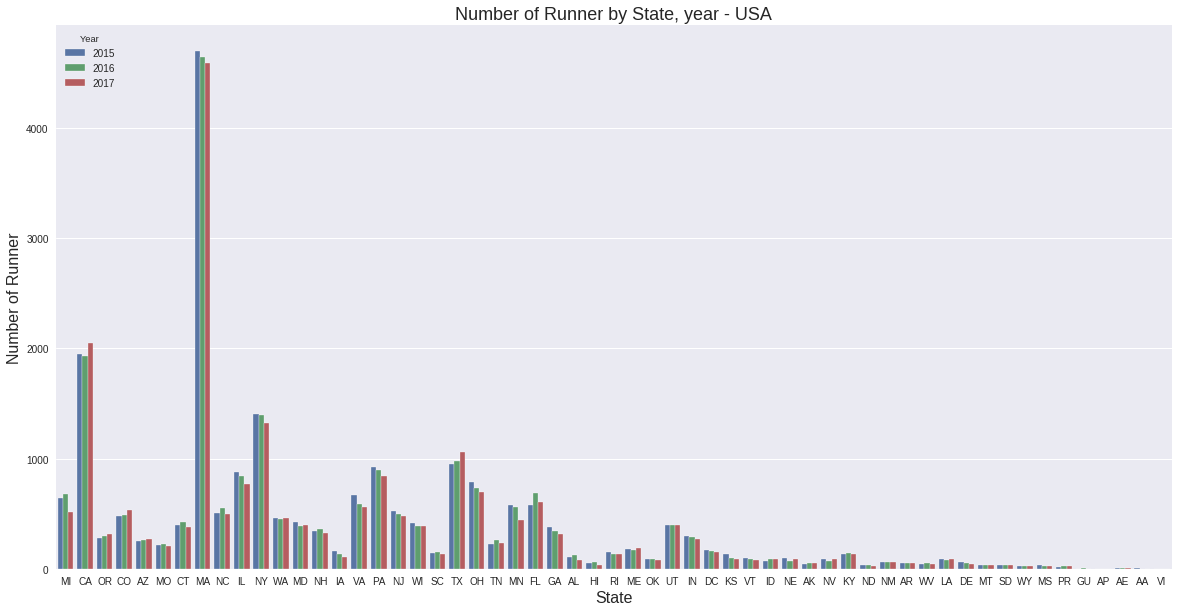

In [0]:
# 1. Bar chart make column chart,(보스턴 마라톤 미국에서 출전하는 사람 state ))
# Import pandas as a alias 'pd'
import pandas as pd

# Load the CSV files "marathon_results_2015 ~ 2017.csv" under "data" folder
marathon_2015_2017 = pd.read_csv("/content/gdrive/My Drive/data/marathon_2015_2017.csv")

# Import pyplot as a alias 'plt' : 시각화 툴
import matplotlib.pyplot as plt
# Import seaborn as a alias 'sns' : 통계 차트를 만드는 라이브러리
import seaborn as sns

# Select runners from USA by conditional expression
USA_runner = marathon_2015_2017[marathon_2015_2017.Country == 'USA']

# Configure figure size(화면에 출력되는 사이즈를 정하기))
plt.figure(figsize=(20,10))
# Number of Runner by State - USA
runner_state = sns.countplot('State',data=USA_runner)
runner_state.set_title('Number of Runner by State - USA', fontsize=18)
runner_state.set_xlabel('State', fontdict= {'size':16})
runner_state.set_ylabel('Number of Runner', fontdict= {'size':16})
plt.show()

plt.figure(figsize=(20,10))
# Number of Runner by State, Gender - USA , hue 색 구분 ,palette 색깔 구분
runner_state = sns.countplot('State',data=USA_runner, hue='M/F',  palette={'F':'r','M':'b'})
runner_state.set_title('Number of Runner by State, Gender - USA', fontsize=18)
runner_state.set_xlabel('State', fontdict= {'size':16})
runner_state.set_ylabel('Number of Runner', fontdict= {'size':16})
plt.show()

plt.figure(figsize=(20,10))
# Number of Runner by State, year - USA
runner_state = sns.countplot('State',data=USA_runner, hue='Year')
runner_state.set_title('Number of Runner by State, year - USA', fontsize=18)
runner_state.set_xlabel('State', fontdict= {'size':16})
runner_state.set_ylabel('Number of Runner', fontdict= {'size':16})
plt.show()



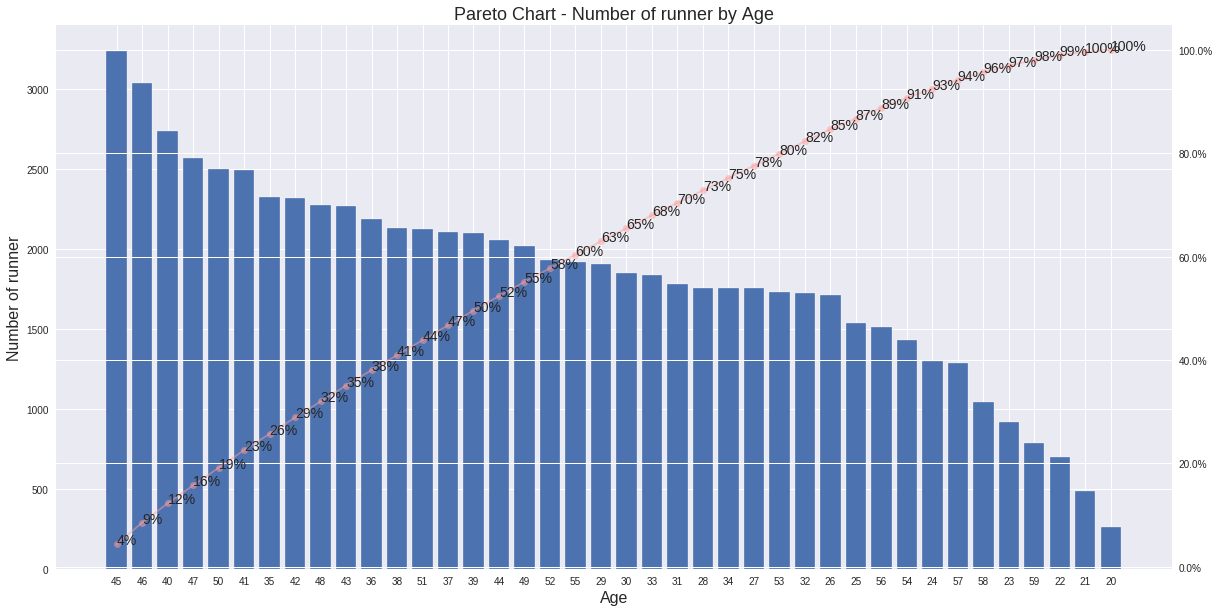

In [0]:
# 2.Pareto 차트 구현하기 (2015~2017 출전하는 사람 나이비율)
# Import pandas as a alias 'pd'
import pandas as pd

# Load the CSV files "marathon_results_2015 ~ 2017.csv" under "data" folder
marathon_2015_2017 = pd.read_csv("/content/gdrive/My Drive/data/marathon_2015_2017.csv")

# Import pyplot as a alias 'plt'
import matplotlib.pyplot as plt

# Select runners from Age 20 to 60 by conditional expression
runner_2060 = marathon_2015_2017[marathon_2015_2017.Age.isin(range(20,60))]
# Create runner_2060_counting Dataframe with counting by Age
runner_2060_counting = runner_2060['Age'].value_counts()
# Store index of runner_2060_counting into x
x = runner_2060_counting.index
# Conver x values to String in order to avoid int sorting
x = [str(i) for i in x]
# Store values of runner_2060_counting into y
y = runner_2060_counting.values
# Calculate ratio and accumulated ratio
ratio = y / y.sum()
ratio_sum = ratio.cumsum()

# Configure figure size
fig, barChart = plt.subplots(figsize=(20,10))
# Create bar Chart
barChart.bar(x, y)
# Create line Chart # twinx : x를 공유
lineChart = barChart.twinx()
lineChart.plot(x, ratio_sum, '-ro', alpha=0.5)
# Create right side labels
ranges = lineChart.get_yticks()
lineChart.set_yticklabels(['{:,.1%}'.format(x) for x in ranges])
# Create annotations on line chart
ratio_sum_percentages = ['{0:.0%}'.format(x) for x in ratio_sum]
# i : 순서 txt : 문자열 , annoate는 txt를 (x[i],ratio_sum[i]) 위치에 출력하기
for i, txt in enumerate(ratio_sum_percentages):
    lineChart.annotate(txt, (x[i], ratio_sum[i]), fontsize=14)    
# Generate labels and title
barChart.set_xlabel('Age', fontdict= {'size':16})
barChart.set_ylabel('Number of runner', fontdict= {'size':16})
plt.title('Pareto Chart - Number of runner by Age', fontsize=18)
# Show plot
plt.show()

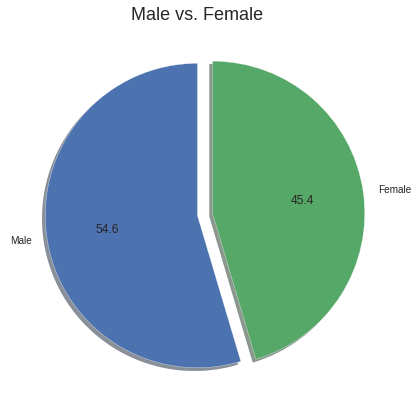

In [0]:
# 3. Pie char록(2015~2017 남/여 비율)
#Import pandas as a alias 'pd'
import pandas as pd

# Load the CSV files "marathon_results_2015 ~ 2017.csv" under "data" folder
marathon_2015_2017 = pd.read_csv("/content/gdrive/My Drive/data/marathon_2015_2017.csv")

# Import pyplot as a alias 'plt'
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Male', 'Female'
# only "explode" the 2nd slice (i.e. 'Female') 입체적으로 보여주기
explode = (0, 0.1)  
# Configure figure size
plt.figure(figsize=(7,7))
# Creae pie Chart
plt.pie(marathon_2015_2017['M/F'].value_counts(), explode=explode, labels=labels, startangle = 90, shadow=True, autopct='%.1f')
# Generate labels and title
plt.title("Male vs. Female",fontsize=18)
# Show plot
plt.show()

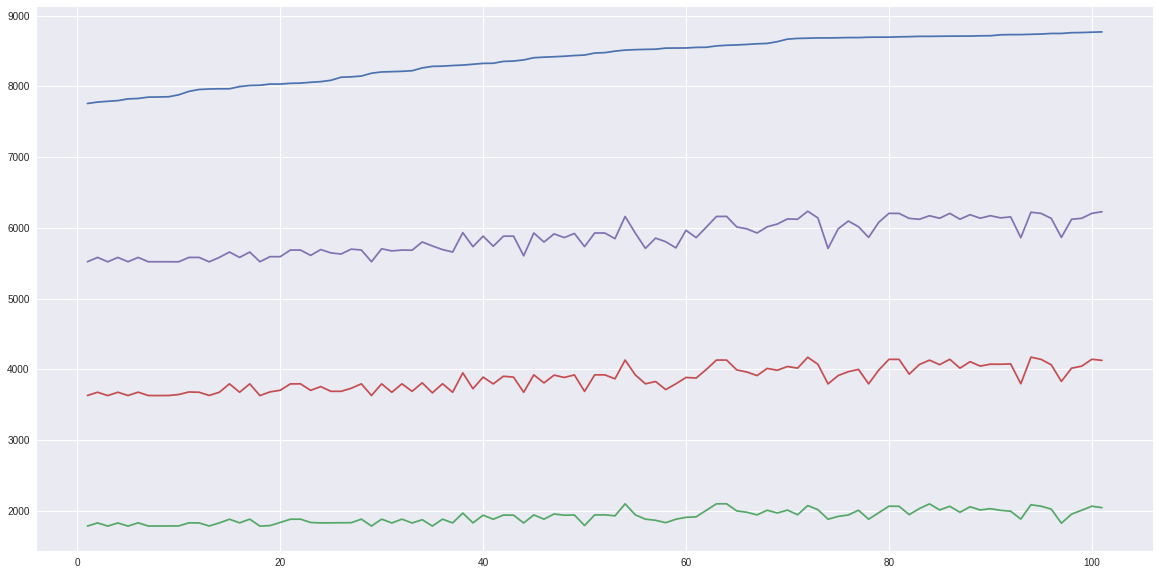

In [0]:
# 4. Line chart (2015~2017 상위 100명의 거리별)
# Import pandas as a alias 'pd'
import pandas as pd

# Load the CSV files "marathon_results_2015 ~ 2017.csv" under "data" folder
marathon_2015_2017 = pd.read_csv("/content/gdrive/My Drive/data/marathon_2015_2017.csv")

# Import pyplot as a alias 'plt'
import matplotlib.pyplot as plt

# Merge 2015, 2016 and 2017 files into marathon_2015_2017 file index by Official Time
record = pd.DataFrame(marathon_2015_2017,columns=['5K',  '10K',  '15K',  '20K', 'Half',  '25K',  '30K',  '35K',  '40K',  'Official Time']).sort_values(by=['Official Time'])

# Insert Rank column
record.insert(0, 'Rank', range(1, 1 + len(record)))
# Select Top 100
top100 = record[0:101]
# Set Rank as x
xData = top100.Rank
# Set yData_full, yData_10K, yData_20K, yData_30K
yData_full = top100['Official Time']
yData_10K = top100['10K']
yData_20K = top100['20K']
yData_30K = top100['30K']

# Import pyplot as a alias 'plt'
import matplotlib.pyplot as plt
# Configure figure size
plt.figure(figsize=(20,10))
# plot the data yData_full, yData_10K, yData_20K, yData_30K
plt.plot(xData, yData_full)
plt.plot(xData, yData_10K)
plt.plot(xData, yData_20K)
plt.plot(xData, yData_30K)

# display the plot
plt.show()

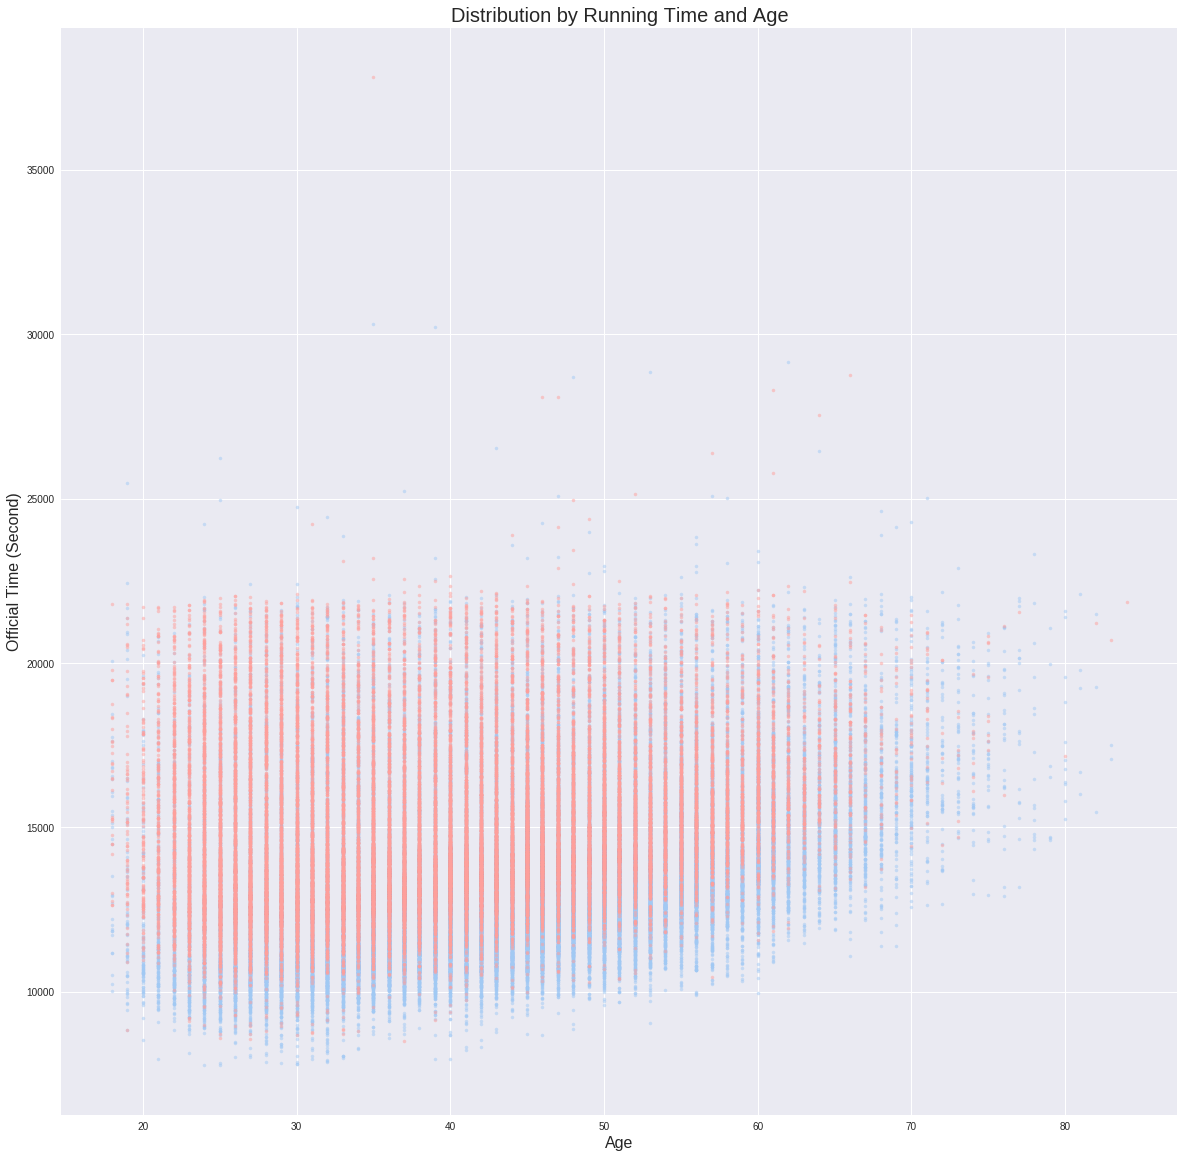

In [0]:
# 5. Scatter chart(20~60 나이대별 Official Time)
# Import pandas as a alias 'pd'
import pandas as pd

# Load the CSV files "marathon_results_2015 ~ 2017.csv" under "data" folder
marathon_2015_2017 = pd.read_csv("/content/gdrive/My Drive/data/marathon_2015_2017.csv")

# Import pyplot as a alias 'plt'
import matplotlib.pyplot as plt


# Select male and female runners by conditional expression
MALE_runner = marathon_2015_2017[marathon_2015_2017['M/F'] == 'M']
FEMALE_runner = marathon_2015_2017[marathon_2015_2017['M/F'] == 'F']
# Configure figure size
plt.figure(figsize=(20,20))
# Set MALE_runner.Age as x_male
x_male = MALE_runner.Age
# Set MALE_runner Official Time as y_male
y_male = MALE_runner['Official Time']
# Set FEMALE_runner.Age as x_male
x_female = FEMALE_runner.Age
# Set FEMALE_runner Official Time as y_male
y_female = FEMALE_runner['Official Time']
# Creae Charts
plt.plot(x_male, y_male, '.', color='b', alpha=0.5)
plt.plot(x_female, y_female, '.', color='r', alpha=0.5)
# Generate labels and title
plt.xlabel("Age", fontsize=16)
plt.ylabel("Official Time (Second)",fontsize=16)
plt.title("Distribution by Running Time and Age",fontsize=20)
# Show plot
plt.show()

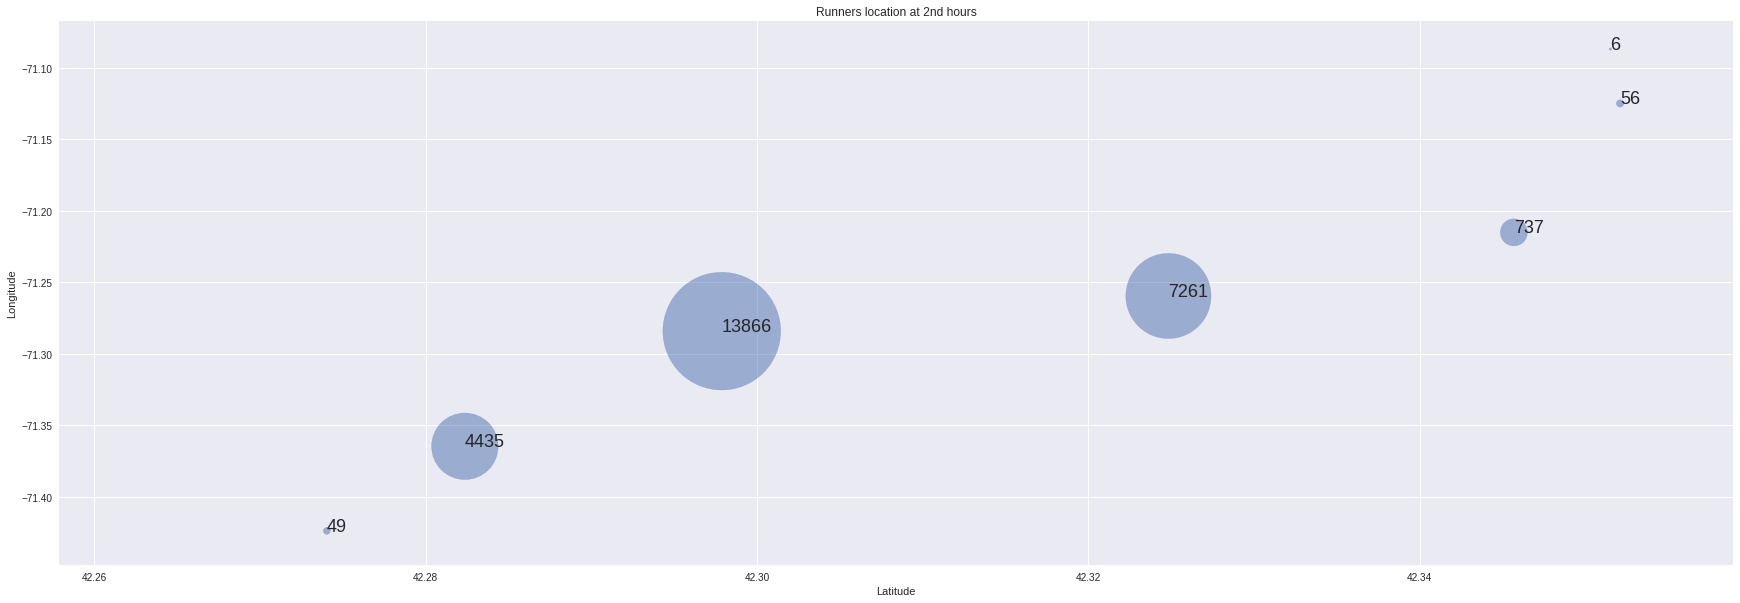

In [0]:
# 6. Bubble chart(2시간 지난 후, 사람들이 어디(위도,경도)에 위치하는지 표현)
# Import pandas as a alias 'pd'
import pandas as pd

# Load the CSV files "marathon_results_2017.csv" under "data" folder
marathon_results_2017 = pd.read_csv("/content/gdrive/My Drive/data/marathon_results_2017.csv")

#Drop unnecessary columns 
marathon_2017 = marathon_results_2017.drop(['Unnamed: 0','Bib', 'Name', 'Age', 'City', 'State', 'Country', 'Citizen', 'Unnamed: 9', 'Half', 'Pace', 'Proj Time', 'Official Time', 'Overall', 'Gender', 'Division'], axis='columns')

# Import Numpy Library and call it as np
import numpy as np

# Convert using pandas to_timedelta method
marathon_2017['5K']  = pd.to_timedelta(marathon_2017['5K'])
marathon_2017['10K'] = pd.to_timedelta(marathon_2017['10K'])
marathon_2017['15K'] = pd.to_timedelta(marathon_2017['15K'])
marathon_2017['20K'] = pd.to_timedelta(marathon_2017['20K'])
marathon_2017['25K'] = pd.to_timedelta(marathon_2017['25K'])
marathon_2017['30K'] = pd.to_timedelta(marathon_2017['30K'])
marathon_2017['35K'] = pd.to_timedelta(marathon_2017['35K'])
marathon_2017['40K'] = pd.to_timedelta(marathon_2017['40K'])

# Convert time to seconds value using astype method
marathon_2017['5K'] = marathon_2017['5K'].astype('m8[s]').astype(np.int64)
marathon_2017['10K'] = marathon_2017['10K'].astype('m8[s]').astype(np.int64)
marathon_2017['15K'] = marathon_2017['15K'].astype('m8[s]').astype(np.int64)
marathon_2017['20K'] = marathon_2017['20K'].astype('m8[s]').astype(np.int64)
marathon_2017['25K'] = marathon_2017['25K'].astype('m8[s]').astype(np.int64)
marathon_2017['30K'] = marathon_2017['30K'].astype('m8[s]').astype(np.int64)
marathon_2017['35K'] = marathon_2017['35K'].astype('m8[s]').astype(np.int64)
marathon_2017['40K'] = marathon_2017['40K'].astype('m8[s]').astype(np.int64)

# Define function name to_seconds
check_time = 7200
Lat = 0
Long = 0
Location = ''
# 5km, 10km, 15km, 20km, 25km, 35km, 40km 각 지점 위도,경도
points = [[42.247835,-71.474357], [42.274032,-71.423979], [42.282364,-71.364801], [42.297870,-71.284260], 
          [42.324830,-71.259660], [42.345680,-71.215169], [42.352089,-71.124947], [42.351510,-71.086980]]

marathon_location = pd.DataFrame(columns=['Lat','Long'])
for index, record in marathon_2017.iterrows():
    if (record['40K'] < check_time):
        Lat = points[7][0]
        Long = points[7][1]
    elif (record['35K'] < check_time):
        Lat = points[6][0]
        Long = points[6][1]
    elif (record['30K'] < check_time):
        Lat = points[5][0]
        Long = points[5][1]
    elif (record['25K'] < check_time):
        Lat = points[4][0]
        Long = points[4][1]
    elif (record['20K'] < check_time):
        Lat = points[3][0]
        Long = points[3][1]
    elif (record['15K'] < check_time):
        Lat = points[2][0]
        Long = points[2][1]
    elif (record['10K'] < check_time):
        Lat = points[1][0]
        Long = points[1][1]
    elif (record['5K'] < check_time):
        Lat = points[0][0]
        Long = points[0][1]
    else:
        Lat = points[0][0]
        Long = points[0][1]
    marathon_location = marathon_location.append({'Lat' : Lat,
                                        'Long' : Long},
                                        ignore_index=True)

marathon_count = marathon_location.groupby(['Lat', 'Long']).size().reset_index(name='Count')

# Import pyplot as a alias 'plt'
import matplotlib.pyplot as plt

# Configure figure size
plt.figure(figsize=(30,10))
plt.scatter(marathon_count.Lat, marathon_count.Long, s=marathon_count.Count, alpha=0.5)

for i, txt in enumerate(marathon_count.Count):
    plt.annotate(txt, (marathon_count.Lat[i], marathon_count.Long[i]), fontsize=18)

# Add a title
plt.title("Runners location at 2nd hours")
# Add x-axis label
plt.xlabel("Latitude")
# Add y-axis label
plt.ylabel("Longitude")

plt.show()


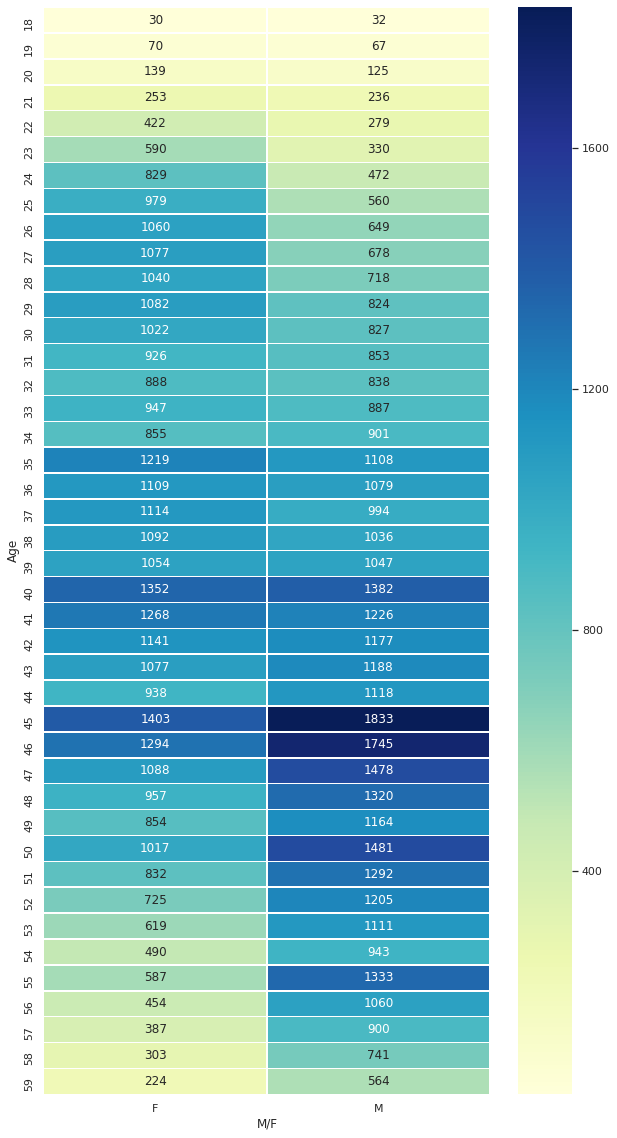

In [0]:
# 7. Heat Map 제작.(참가자 중에서 어떤 성별,나이들이 보스턴 마라톤에 참여하는지 확인)
# Import pandas as a alias 'pd'
import pandas as pd

# Load the CSV files "marathon_results_2015 ~ 2017.csv" under "data" folder
marathon_2015_2017 = pd.read_csv("/content/gdrive/My Drive/data/marathon_2015_2017.csv")

# Import pyplot as a alias 'plt'
import matplotlib.pyplot as plt
# Import seaborn as a alias 'sns' support heap map
import seaborn as sns
sns.set()

# Creatr marathon_2015_2017_under60 dataframe under age 60
marathon_2015_2017_under60 = marathon_2015_2017[marathon_2015_2017.Age.isin(range(0,60))]

# Counting by age, Male and Female pandas support, unstack : reshape
marathon = marathon_2015_2017_under60.groupby('Age')['M/F'].value_counts().unstack().fillna(0)

# Draw a heatmap with the numeric values in each cell
# plt.subplots() 편의 함수는 Figure 객체를 생성하고 Figure.subplots()를 호출하여 리턴
# annot=True argument를 써서 각 셀에 숫자를 입력(annotate each cell with numeric value),fmt='d'는 정수 형태(integer format)로 숫자를 입력
f, ax = plt.subplots(figsize=(10, 20))
# API를 잘보는 습관을 기르자!
# sns.heatmap(marathon, annot=True, fmt="d", linewidths=.5, ax=ax)
sns.heatmap(marathon, annot=True, fmt="d", linewidths=.5, ax=ax, cmap ="YlGnBu")

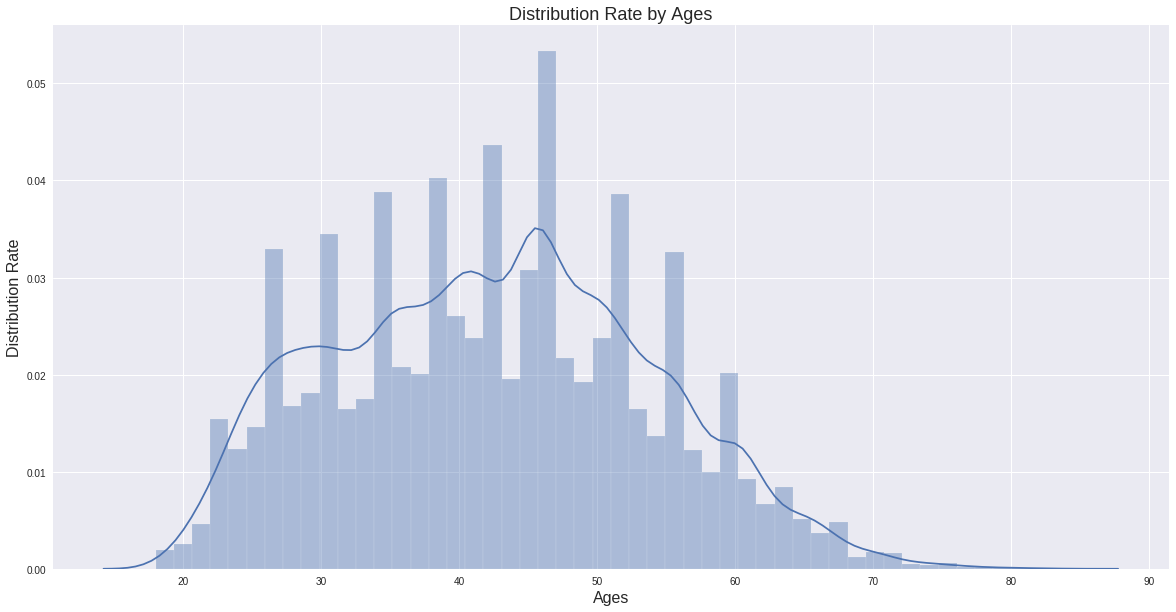

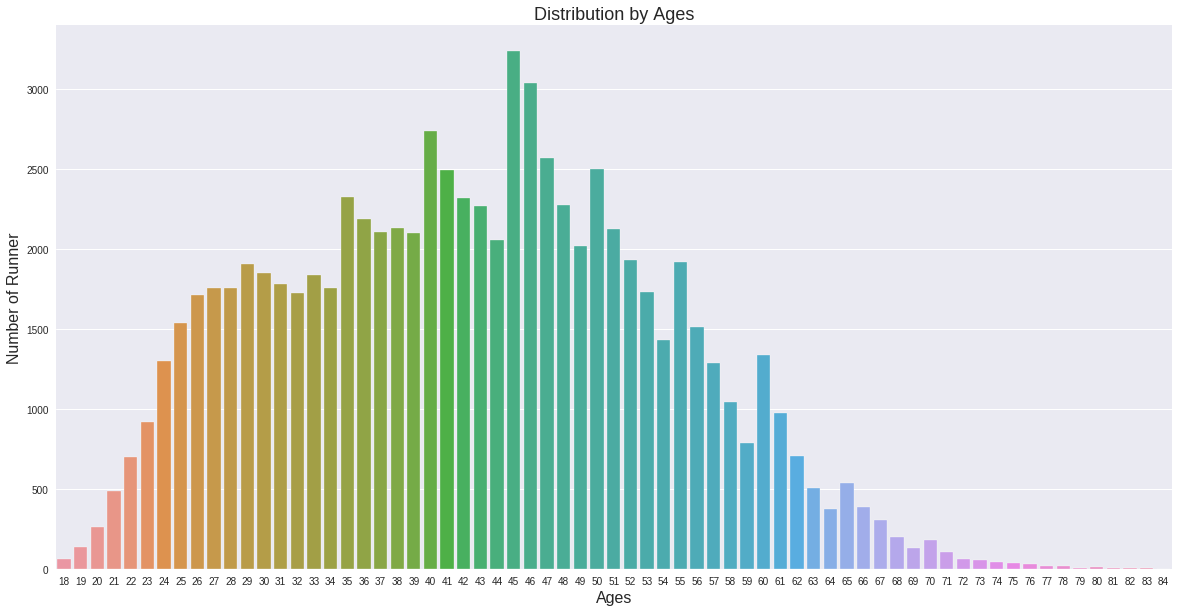

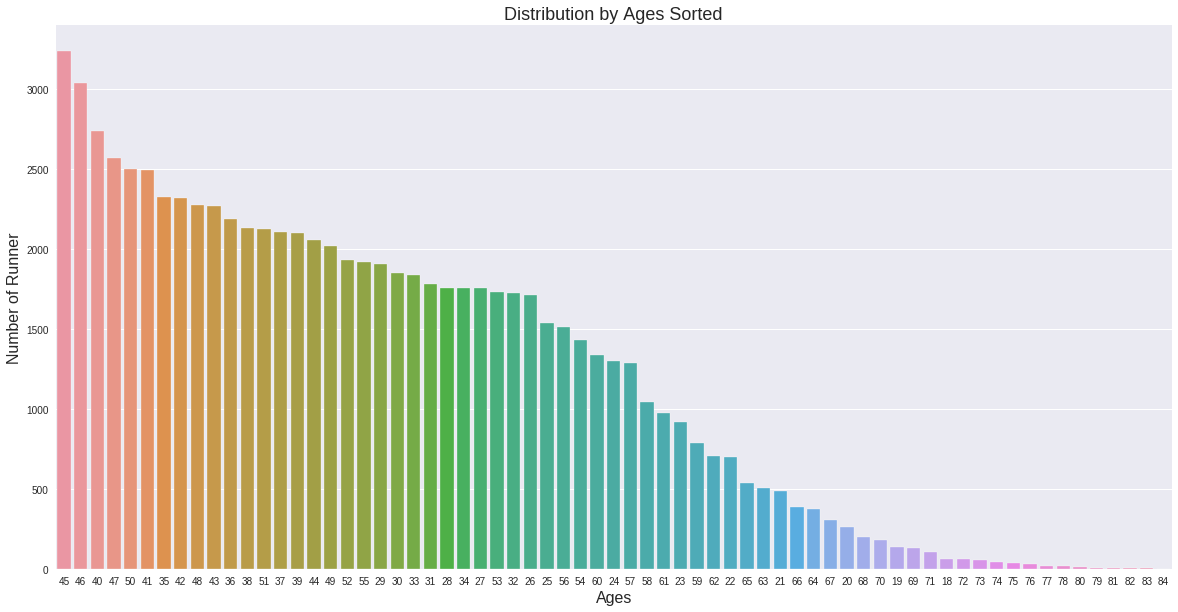

In [0]:
# 8.Histogram (2015~2017 연령대별 분포 구하기)
# Import pandas as a alias 'pd'
import pandas as pd

# Load the CSV files "marathon_results_2015 ~ 2017.csv" under "data" folder
marathon_2015_2017 = pd.read_csv("/content/gdrive/My Drive/data/marathon_2015_2017.csv")

# Import pyplot as a alias 'plt'
import matplotlib.pyplot as plt
# Import seaborn as a alias 'sns'
import seaborn as sns

# Configure figure size
plt.figure(figsize=(20,10))
# Create histogram - Distribution Rate
age_count = sns.distplot(marathon_2015_2017.Age)
age_count.set_xlabel('Ages',fontdict= {'size':16})
age_count.set_ylabel('Distribution Rate',fontdict= {'size':16})
age_count.set_title('Distribution Rate by Ages',fontsize=18)
plt.show()

# Configure figure size
plt.figure(figsize=(20,10))
# Create histogram - Distribution by Ages
age_count = sns.countplot('Age',data=marathon_2015_2017)
age_count.set_title('Distribution by Ages', fontsize=18)
age_count.set_xlabel('Ages', fontdict= {'size':16})
age_count.set_ylabel('Number of Runner', fontdict= {'size':16})
plt.show()

# Configure figure size
plt.figure(figsize=(20,10))
# Create histogram - Distribution by Ages Sorted 
age_count = sns.countplot('Age',data=marathon_2015_2017,order = marathon_2015_2017['Age'].value_counts().index)
age_count.set_title('Distribution by Ages Sorted', fontsize=18)
age_count.set_xlabel('Ages', fontdict= {'size':16})
age_count.set_ylabel('Number of Runner', fontdict= {'size':16})
plt.show()


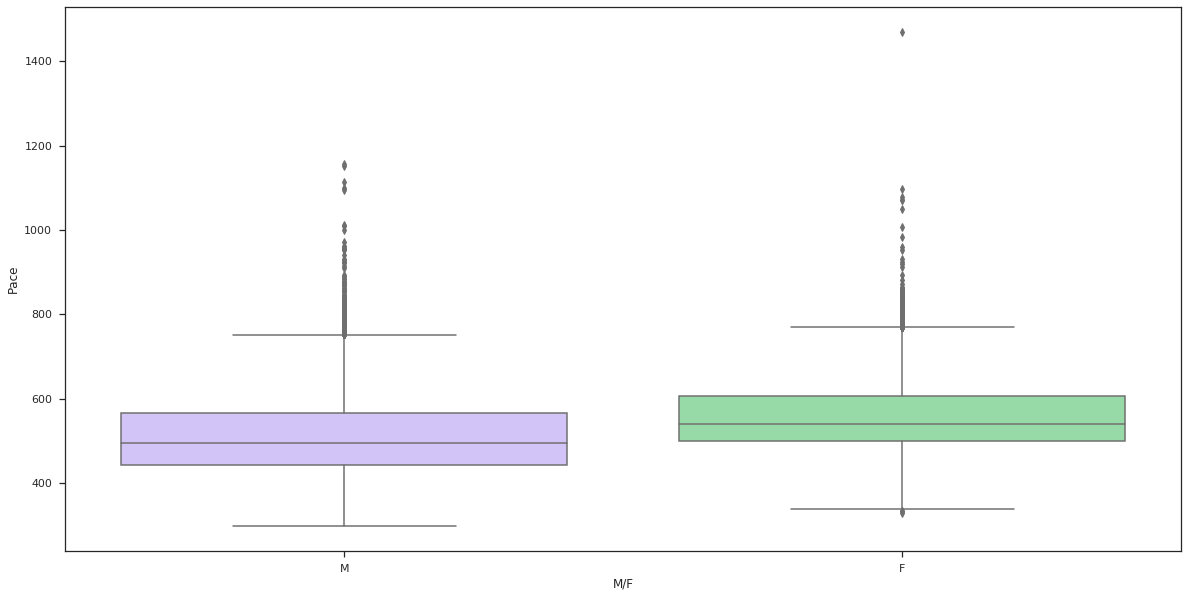

In [0]:
# 9. Box plot (남,여 pace를 비교))
# Import pandas as a alias 'pd'
import pandas as pd

# Load the CSV files "marathon교results_2015 ~ 2017.csv" under "data" folder
marathon_2015_2017 = pd.read_csv("/content/gdrive/My Drive/data/marathon_2015_2017.csv")

# Import pyplot as a alias 'plt'
import matplotlib.pyplot as plt
# Import seaborn as a alias 'sns'
import seaborn as sns

# Select runners from USA by conditional expression
USA_runner = marathon_2015_2017[marathon_2015_2017.Country == 'USA']
USA_MALE_runner = USA_runner[USA_runner['M/F'] == 'M']
USA_FEMALE_runner = USA_runner[USA_runner['M/F'] == 'F']
# Configure figure size
plt.figure(figsize=(20,10))
sns.set(style="ticks", palette="pastel")
# Draw a nested boxplot to show Pace by Gender
sns.boxplot(x="M/F", y="Pace",
            palette=["m", "g"],
            data=USA_runner)

# Generate USA_MALE_runner_statistics, USA_FEMALE_runner_statistics 
USA_MALE_runner_statistics = USA_MALE_runner['Pace'].describe()
USA_FEMALE_runner_statistics = USA_FEMALE_runner['Pace'].describe()

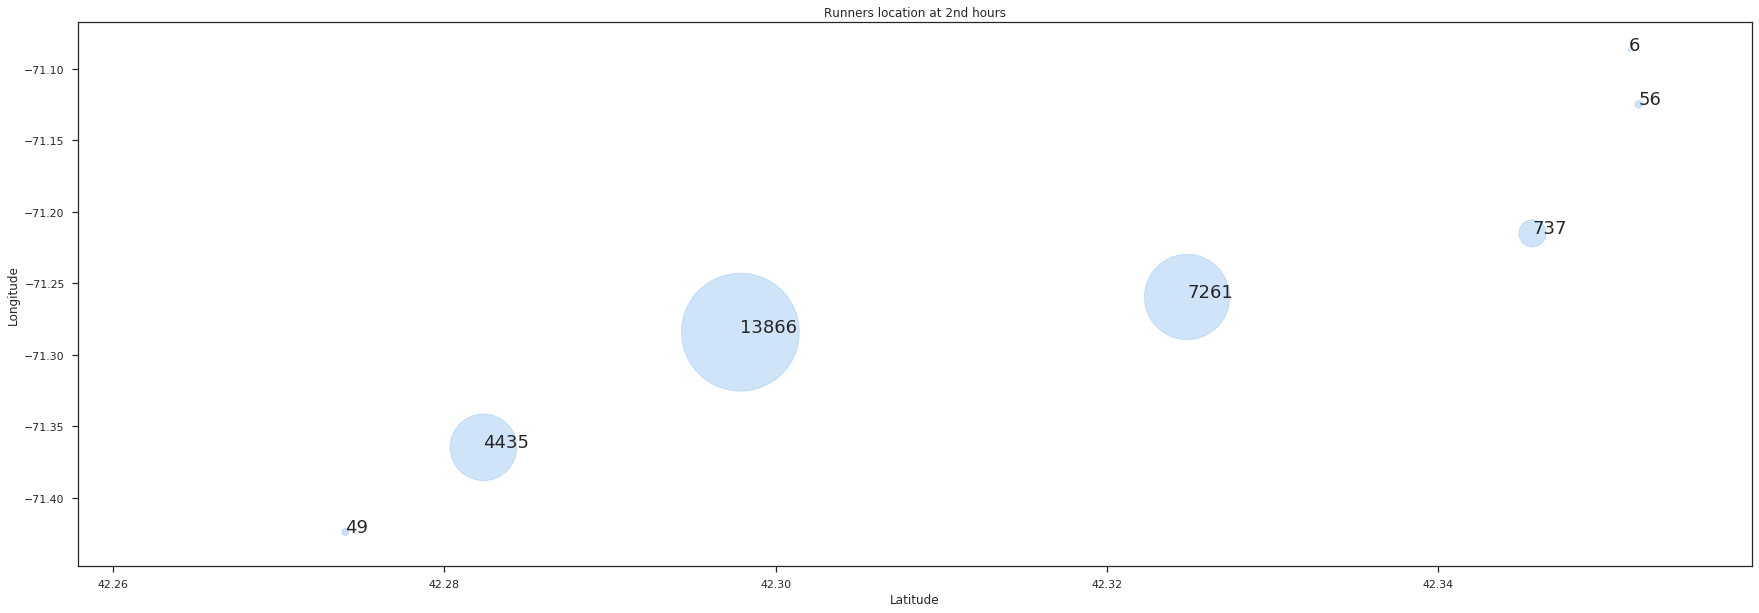

In [0]:
# 10. Geo chart / Folium 라이브러리 설치
# Import pandas as a alias 'pd'
import pandas as pd

# Load the CSV files "marathon_results_2017.csv" under "data" folder
marathon_results_2017 = pd.read_csv("/content/gdrive/My Drive/data/marathon_results_2017.csv")

#Drop unnecessary columns 
marathon_2017 = marathon_results_2017.drop(['Unnamed: 0','Bib', 'Name', 'Age', 'City', 'State', 'Country', 'Citizen', 'Unnamed: 9', 'Half', 'Pace', 'Proj Time', 'Official Time', 'Overall', 'Gender', 'Division'], axis='columns')

# Import Numpy Library and call it as np
import numpy as np

# Convert using pandas to_timedelta method
marathon_2017['5K'] = pd.to_timedelta(marathon_2017['5K'])
marathon_2017['10K'] = pd.to_timedelta(marathon_2017['10K'])
marathon_2017['15K'] = pd.to_timedelta(marathon_2017['15K'])
marathon_2017['20K'] = pd.to_timedelta(marathon_2017['20K'])
marathon_2017['25K'] = pd.to_timedelta(marathon_2017['25K'])
marathon_2017['30K'] = pd.to_timedelta(marathon_2017['30K'])
marathon_2017['35K'] = pd.to_timedelta(marathon_2017['35K'])
marathon_2017['40K'] = pd.to_timedelta(marathon_2017['40K'])

# Convert time to seconds value using astype method
marathon_2017['5K'] = marathon_2017['5K'].astype('m8[s]').astype(np.int64)
marathon_2017['10K'] = marathon_2017['10K'].astype('m8[s]').astype(np.int64)
marathon_2017['15K'] = marathon_2017['15K'].astype('m8[s]').astype(np.int64)
marathon_2017['20K'] = marathon_2017['20K'].astype('m8[s]').astype(np.int64)
marathon_2017['25K'] = marathon_2017['25K'].astype('m8[s]').astype(np.int64)
marathon_2017['30K'] = marathon_2017['30K'].astype('m8[s]').astype(np.int64)
marathon_2017['35K'] = marathon_2017['35K'].astype('m8[s]').astype(np.int64)
marathon_2017['40K'] = marathon_2017['40K'].astype('m8[s]').astype(np.int64)

# Define function name to_seconds
check_time = 7200
Lat = 0
Long = 0
Location = ''
points = [[42.247835,-71.474357], [42.274032,-71.423979], [42.282364,-71.364801], [42.297870,-71.284260], 
          [42.324830,-71.259660], [42.345680,-71.215169], [42.352089,-71.124947], [42.351510,-71.086980]]

marathon_location = pd.DataFrame(columns=['Lat','Long'])
for index, record in marathon_2017.iterrows():
    if (record['40K'] < check_time):
        Lat = points[7][0]
        Long = points[7][1]
    elif (record['35K'] < check_time):
        Lat = points[6][0]
        Long = points[6][1]
    elif (record['30K'] < check_time):
        Lat = points[5][0]
        Long = points[5][1]
    elif (record['25K'] < check_time):
        Lat = points[4][0]
        Long = points[4][1]
    elif (record['20K'] < check_time):
        Lat = points[3][0]
        Long = points[3][1]
    elif (record['15K'] < check_time):
        Lat = points[2][0]
        Long = points[2][1]
    elif (record['10K'] < check_time):
        Lat = points[1][0]
        Long = points[1][1]
    elif (record['5K'] < check_time):
        Lat = points[0][0]
        Long = points[0][1]
    marathon_location = marathon_location.append({'Lat' : Lat,
                                        'Long' : Long},
                                        ignore_index=True)

marathon_count = marathon_location.groupby(['Lat', 'Long']).size().reset_index(name='Count')

# Import pyplot as a alias 'plt'
import matplotlib.pyplot as plt

# Configure figure size
plt.figure(figsize=(30,10))
plt.scatter(marathon_count.Lat, marathon_count.Long, s=marathon_count.Count, alpha=0.5)

for i, txt in enumerate(marathon_count.Count):
    plt.annotate(txt, (marathon_count.Lat[i], marathon_count.Long[i]), fontsize=18)

# Add a title
plt.title("Runners location at 2nd hours")
# Add x-axis label
plt.xlabel("Latitude")
# Add y-axis label
plt.ylabel("Longitude")

plt.show()

# Import folium for Geo Map
import folium
from folium.plugins import HeatMap

# Create basic Folium marathon map
marathon_map = folium.Map(location=[42.324830,-71.259660], tiles = "Stamen Toner",zoom_start = 11)

# 원하는 point(경도,위도)좌표를 지도에 출력)
#points = [[42.247835,-71.474357,0], [42.274032,-71.423979,49], [42.282364,-71.364801,4435], [42.297870,-71.284260,13866], 
#          [42.324830,-71.259660,7261], [42.345680,-71.215169,737], [42.352089,-71.124947,56], [42.351510,-71.086980,6]]
#HeatMap(points).add_to(marathon_map)
#print(marathon_count)
#print(type(marathon_count))
marathon_count_list = marathon_count.values.tolist()

HeatMap(marathon_count_list, radius=20).add_to(marathon_map)

# Plot!
marathon_map



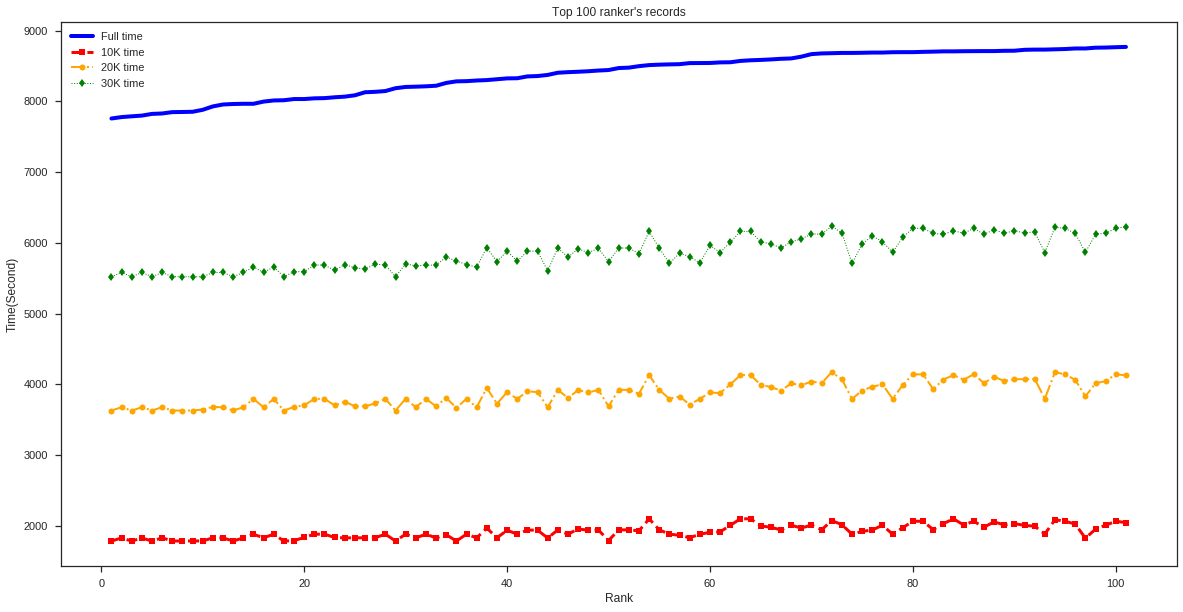

In [0]:
# 11. advanced chart
# Import pandas as a alias 'pd'
import pandas as pd

# Load the CSV files "marathon_results_2015 ~ 2017.csv" under "data" folder
marathon_2015_2017 = pd.read_csv("/content/gdrive/My Drive/data/marathon_2015_2017.csv")

# Import pyplot as a alias 'plt'
import matplotlib.pyplot as plt

# Merge 2015, 2016 and 2017 files into marathon_2015_2017 file index by Official Time
record = pd.DataFrame(marathon_2015_2017,columns=['5K',  '10K',  '15K',  '20K', 'Half',  '25K',  '30K',  '35K',  '40K',  'Official Time']).sort_values(by=['Official Time'])

# Insert Rank column
record.insert(0, 'Rank', range(1, 1 + len(record)))
# Select Top 100
top100 = record[0:101]
# Set Rank as x
xData = top100.Rank
# Set yData_full, yData_10K, yData_20K, yData_30K
yData_full = top100['Official Time']
yData_10K = top100['10K']
yData_20K = top100['20K']
yData_30K = top100['30K']

# Import pyplot as a alias 'plt'
import matplotlib.pyplot as plt
# Configure figure size
plt.figure(figsize=(20,10))
# plot the data yData_full, yData_10K, yData_20K, yData_30K
plt.plot(xData, yData_full, color='blue', linewidth=4, linestyle='-', marker='x', label='Full time')
plt.plot(xData, yData_10K, color='red', linewidth=3, linestyle='--', marker='s', label='10K time')
plt.plot(xData, yData_20K, color='orange', linewidth=2, linestyle='-.', marker='o', label='20K time')
plt.plot(xData, yData_30K, color='green', linewidth=1, linestyle=':', marker='d', label='30K time')

# Add a title
plt.title("Top 100 ranker's records")

# Add x-axis label
plt.xlabel("Rank")

# Add y-axis label
plt.ylabel("Time(Second)")

# Legend 범주 작성
plt.legend()

# Style : ggplot, fivethirtyeight, seaborn, default
plt.style.use('seaborn')

# display the plot
plt.show()